<a href="https://colab.research.google.com/github/Ishita2502/HousePricePrediction/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Online MLCC : Oct 2021/Data/Classwork/'

In [ ]:
raw_data = pd.read_csv(path + 'Chennai_house_univariate.csv')
raw_data.head()

,Size,Price
0,721.82,1480000
1,543.69,830000
2,851.72,2060000
3,931.02,2410000
4,552.77,860000


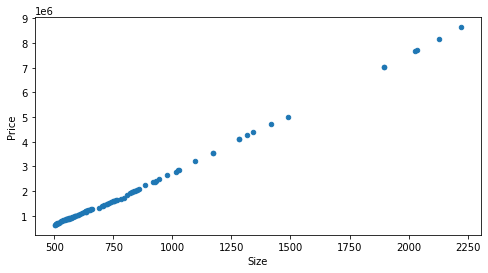

In [ ]:
raw_data.plot(kind='scatter', x='Size', y='Price',figsize=(8,4))

In [ ]:
data= (raw_data-raw_data.mean())/(raw_data.max()-raw_data.min()) # Data preprocess
data.head(2)


,Size,Price
0,-0.054820,-0.063773
1,-0.158528,-0.144922


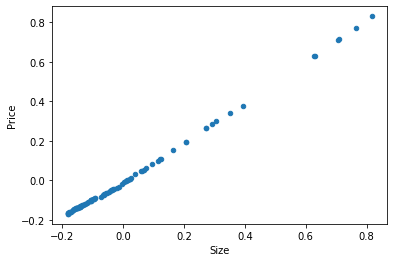

In [ ]:
data.plot(kind='scatter',x='Size',y='Price',figsize=(6,4))

In [ ]:
data.shape

(97, 2)

In [ ]:
data.insert(0,'Bias',1)
data.head()

,Bias,Size,Price
0,1,-0.054820,-0.063773
1,1,-0.158528,-0.144922
2,1,0.020808,0.008636
3,1,0.066977,0.052331
4,1,-0.153242,-0.141177


In [ ]:
cols=data.shape[1]
print(cols)

3


In [ ]:
x=data.iloc[:,0:cols-1]  # 0:2 --> 0,1 column

In [ ]:
y=data.iloc[:,cols-1:cols]  # 2:3 --> 2column

In [ ]:
theta = np.matrix([0,6]) #initial value of theta

In [ ]:
x=np.matrix(x)

In [ ]:
y=np.matrix(y)

In [ ]:
x.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [ ]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [ ]:
computeError(x,y,theta)

0.632229948179241

In [ ]:
line_model=(x*theta.T)

Text(0.5, 1.0, 'Initial Model Vs Data')

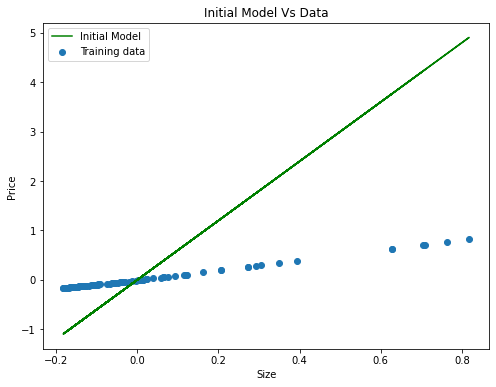

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(data.Size,data.Price,label="Training data")
ax.plot(data.Size,line_model,'g',label="Initial Model")
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Initial Model Vs Data')

In [ ]:
learn_rate=1
iters = 350
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))  # creating a temporary matrix to update the value of theta
  parameters=theta.shape[1]   # finding number of parameters
  cost=[]                     # creating a list to track the cost

  for i in range(iters):      # for each iteration
    error=(x*theta.T)-y       # error

    for j in range(parameters):   # update the value of theta
      gradient=np.multiply(error,x[:,j])
      temp[0,j]=theta[0,j]-((learn_rate/len(x))*np.sum(gradient))   # assign it to

    theta=temp                    # simultaneously update the vlaues of all the theta value
    cost_iter=computeError(x,y,theta)   #find the cost of iteration
    cost.append(cost_iter)
  return theta, cost

In [ ]:
final_theta,cost = gradientDescent(x,y,theta,learn_rate,iters)

In [ ]:
print(final_theta)

[[2.73549797e-16 9.83386677e-01]]


In [ ]:
print(cost)

[0.5703051140593283, 0.5144461382969397, 0.46405883863649905, 0.41860723605304234, 0.3776078534442059, 0.34062457279487657, 0.30726399610921057, 0.2771712607633973, 0.2500262647663031, 0.22554026177539255, 0.20345278964848332, 0.18352889985977064, 0.16555665830890753, 0.14934489093878497, 0.13472115018173123, 0.1215298806028428, 0.10963076422805514, 0.0988972279559027, 0.08921509717603063, 0.08048138127274912, 0.07260317809480772, 0.06549668573803141, 0.059086311128967735, 0.053303865927384654, 0.0480878411942848, 0.04338275310994624, 0.03913855278227096, 0.03531009386746378, 0.031856652340024195, 0.028741493303755705, 0.025931480235881325, 0.023396722507722695, 0.021110257432554895, 0.019047763458521366, 0.01718730145578885, 0.015509081345966022, 0.013995251591379688, 0.012629709304967193, 0.011397928960888653, 0.01028680788382235, 0.009284526873384125, 0.0083804244811071, 0.0075648836026426325, 0.006829229178842817, 0.0061656359175519615, 0.005567045054526774, 0.005027089268055652, 0

In [ ]:
final_model=x*final_theta.T

Text(0.5, 1.0, 'Final_model Vs Training Data')

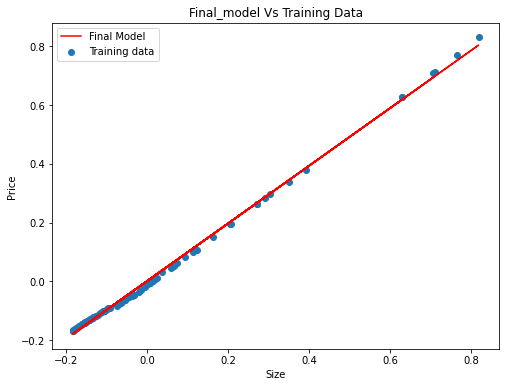

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(data.Size,data.Price,label="Training data")
ax.plot(data.Size,final_model,'r',label="Final Model")
ax.legend()
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Final_model Vs Training Data')

In [ ]:
from sklearn.metrics import mean_absolute_error
Error=mean_absolute_error(final_model,y)
Accuracy=1-Error

print('Error={} %'.format((round(Error*100,2))))
print('Accuracy={} %'.format((round(Accuracy*100,2))))

Error=0.94 %
Accuracy=99.06 %


In [ ]:
def predict(final_theta,accuracy):
  size=float(input("Enter the size of hte house in Sqt:"))
  size=(size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
  price=(final_theta[0,0]+(final_theta[0,1]*size))
  Predicted_price = (price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
  Price_at_max_Accuracy = (Predicted_price*(1/accuracy))
  Price_range=Price_at_max_Accuracy - Predicted_price
  return Predicted_price, Price_range


In [ ]:
Predicted_price, Price_range = predict(final_theta,Accuracy)
print('Your house cost is '+str(round(Predicted_price*(1/100000), 2))+' Lakhs (+ or -) '+str(round(Price_range, 2)))

Enter the size of hte house in Sqt:960
Your house cost is 26.51 Lakhs (+ or -) 25287.99
